In [27]:
import os 
os.chdir('/home/akhilbvs/Kaggle/customer-segmentation')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import warnings 
warnings.filterwarnings("ignore")



In [28]:
data_set=pd.read_csv('Mall_Customers.csv')

In [4]:
data_set.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data_set.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data_set.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

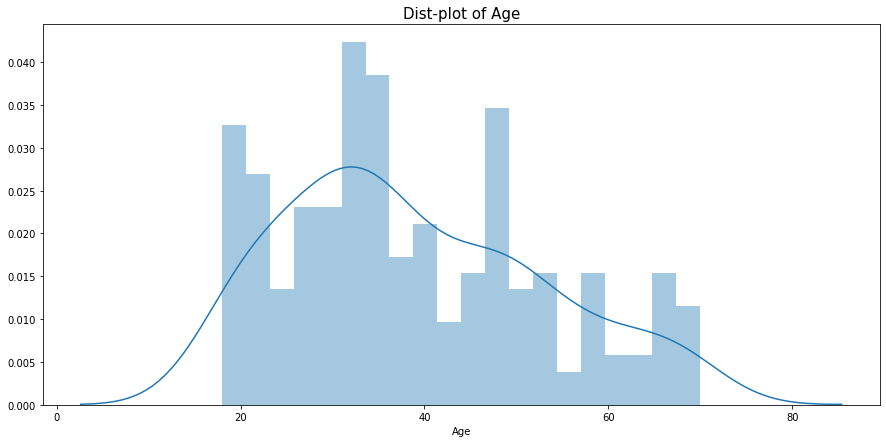

In [7]:
plt.figure(figsize=(15,7))
sns.distplot(data_set['Age'],bins=20)
plt.title('Dist-plot of Age',size=15)
plt.show()

<function matplotlib.pyplot.show>

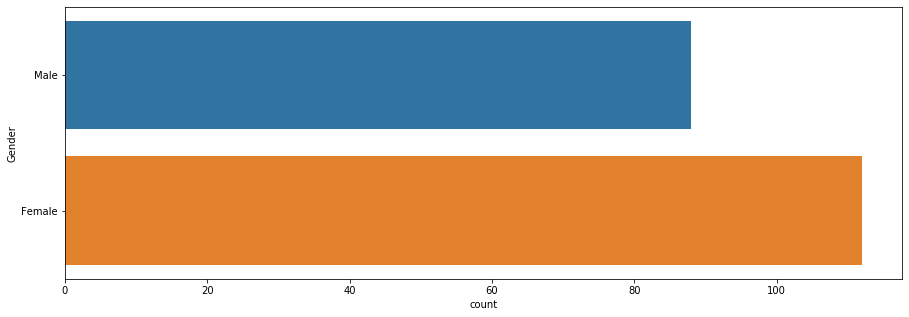

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=data_set)
plt.show

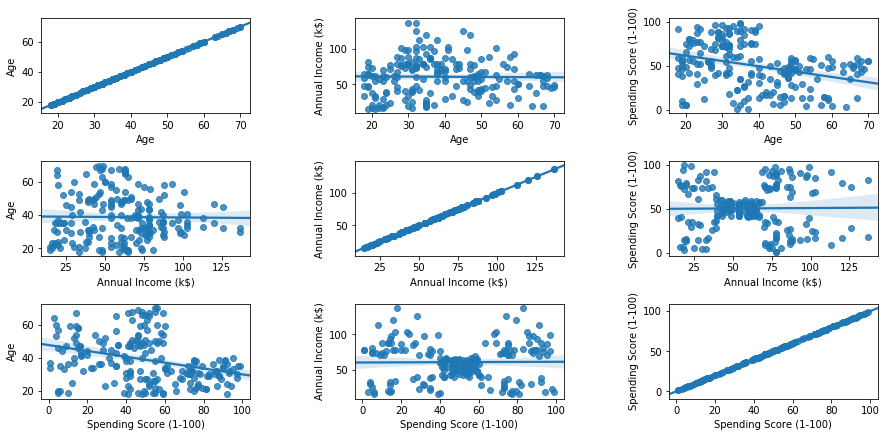

In [9]:
plt.figure(figsize=(15,7))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    for y in ['Age','Annual Income (k$)','Spending Score (1-100)']:
        n+=1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x=x,y=y,data=data_set)
plt.show()

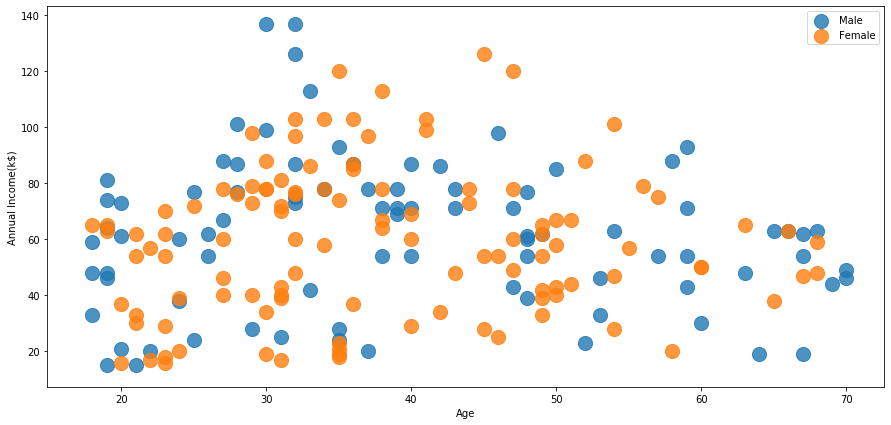

In [10]:
plt.figure(figsize=(15,7))
for gender in ['Male','Female']:
    plt.scatter(x='Age',y='Annual Income (k$)',data=data_set[data_set['Gender']==gender],s=200,alpha=0.8,label=gender)
plt.xlabel('Age')
plt.ylabel('Annual Income(k$)')
plt.legend()
plt.show()

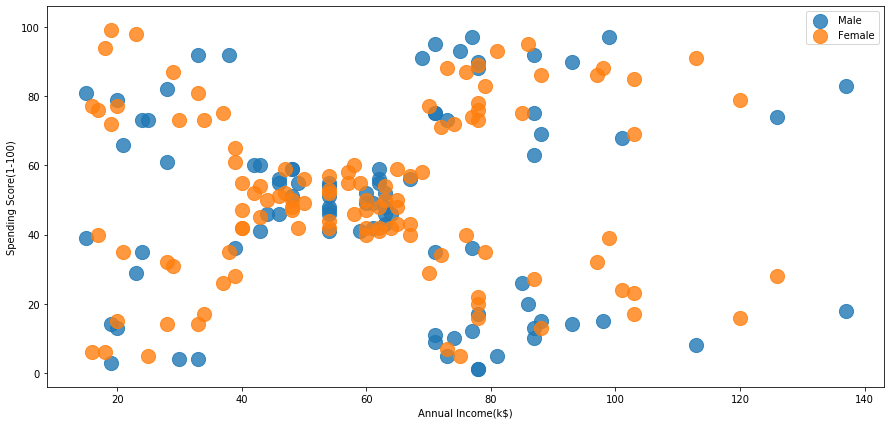

In [11]:
plt.figure(1,figsize=(15,7))
for gender in ['Male','Female']:
    plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=data_set[data_set['Gender']==gender],s=200,alpha=0.8,label=gender)
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

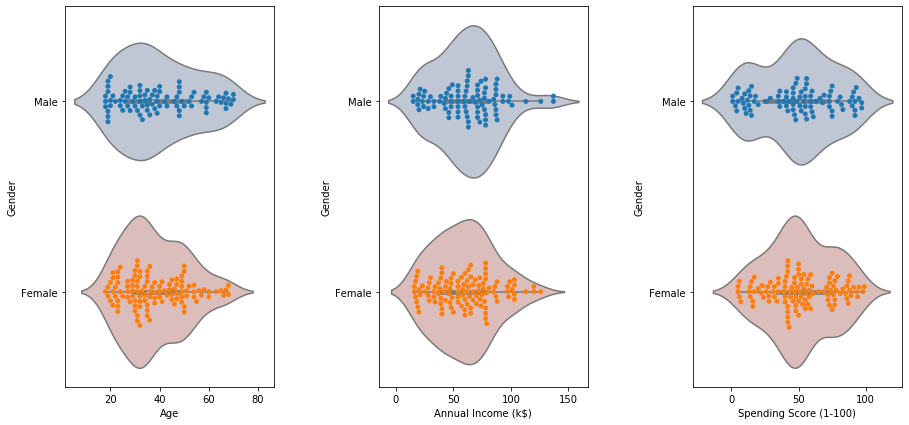

In [12]:
plt.figure(1,figsize=(15,7))
n=0
for columns in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=.5,wspace=.5)
    sns.violinplot(x=columns,y='Gender',data=data_set,palette='vlag')
    sns.swarmplot(x=columns,y='Gender',data=data_set)
plt.show()

In [13]:
# Using K-Means Clustering

In [14]:
#Using Elbow method to find no of clusters 

In [15]:
from sklearn.cluster import KMeans
x=data_set.iloc[:,[3,4]].values
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

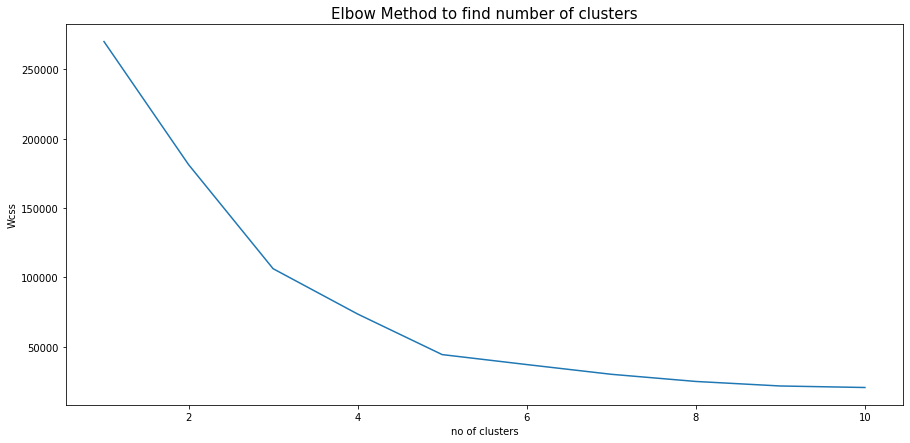

In [16]:
plt.figure(figsize=(15,7))
plt.plot(range(1,11),wcss)
plt.title('Elbow Method to find number of clusters',size=15)
plt.xlabel('no of clusters')
plt.ylabel('Wcss')
plt.show()

In [17]:
# No of Clusters=5

In [18]:
kmeans_model = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeans_model.fit_predict(x)

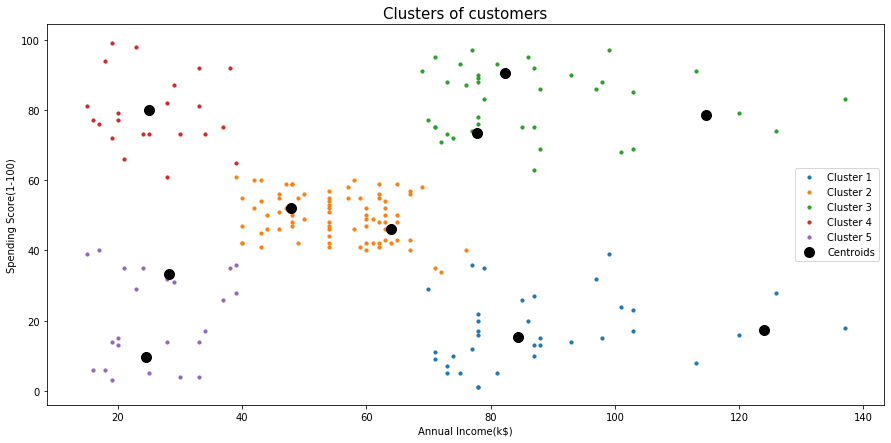

In [19]:
plt.figure(1,figsize=(15,7))
plt.scatter(x[y_kmeans == 0, 0],x[y_kmeans == 0, 1],s = 10,label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0],x[y_kmeans == 1, 1],s = 10,label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0],x[y_kmeans == 2, 1],s = 10,label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0],x[y_kmeans == 3, 1],s = 10,label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0],x[y_kmeans == 4, 1],s = 10,label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='black',s = 100,label = 'Centroids')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.title('Clusters of customers',size=15)
plt.legend()
plt.show()

In [20]:
# Using Hierarchical Clustering

In [21]:
# Unsing Dendogram to find no of clusters

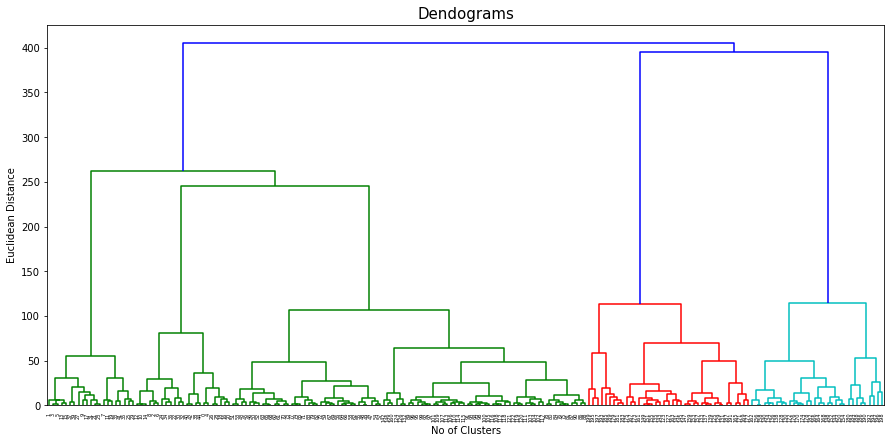

In [23]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,7))
dendogra=sch.dendrogram(sch.linkage(x,method='ward'))
plt.xlabel('No of Clusters')
plt.ylabel('Euclidean Distance')
plt.title('Dendograms',size=15)
plt.show()

In [24]:
#No of clusters =5

In [25]:
from sklearn.cluster import AgglomerativeClustering
dc=AgglomerativeClustering(n_clusters=5,affinity='euclidean')
y_hc=dc.fit_predict(x)

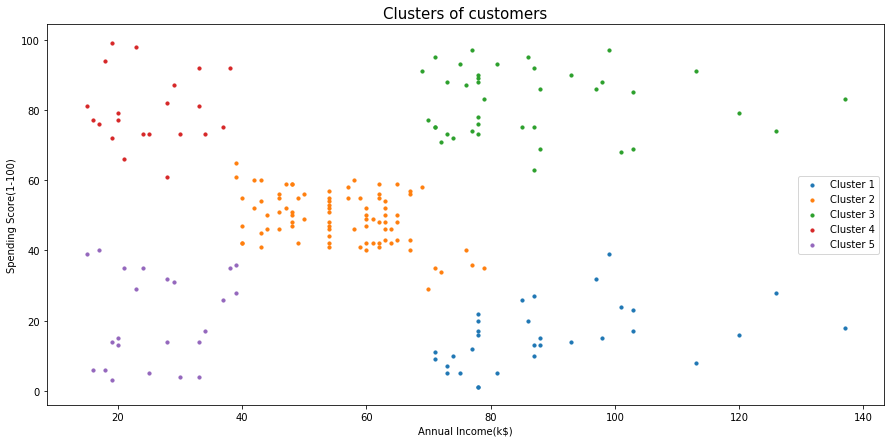

In [26]:
plt.figure(figsize=(15,7))
plt.scatter(x[y_hc == 0, 0],x[y_hc == 0, 1],s = 10,label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0],x[y_hc == 1, 1],s = 10,label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0],x[y_hc == 2, 1],s = 10,label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0],x[y_hc == 3, 1],s = 10,label = 'Cluster 4')
plt.scatter(x[y_hc == 4, 0],x[y_hc == 4, 1],s = 10,label = 'Cluster 5')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.title('Clusters of customers',size=15)
plt.legend()
plt.show()